# Cancer Data Logistic Regression

In [1]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency


Uncomment if you need the data files

In [3]:
# !wget https://aet-cs.github.io/white/ML/lessons/Cancer_Data.csv
# !wget https://aet-cs.github.io/white/ML/lessons/cancer_data_cleaned.csv

In [8]:
data_root = "data/"
filename = "Cancer_Data.csv"
filepath = os.path.join(data_root, filename)
df = pd.read_csv(filepath)

In [9]:
def get_data(filename):
    df = pd.read_csv(filename)
    df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1, inplace=True)
    return df    

In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1, inplace=True)

In [12]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,NaN


In [13]:
def pre_process_data(df, one_hot_encode = False):
   
 
   # Use sklearn Imputers to fill in the categorical and numerical columns
    simple_median = SimpleImputer(strategy='median')
    simple_most_freq = SimpleImputer(strategy='most_frequent')
    
    num_cols = df.select_dtypes(include=np.number).columns # numerical data
    cat_cols = df.select_dtypes(include=object).columns # categorical data

    df[num_cols] = simple_median.fit_transform(df[num_cols])
    df[cat_cols] = simple_most_freq.fit_transform(df[cat_cols])

    if one_hot_encode:
        O_encoder = OrdinalEncoder()
        df[cat_cols]= O_encoder.fit_transform(df[cat_cols])

        # df = pd.get_dummies(df, dtype=int)
    return df


In [14]:
def get_test_train(df, test_size = 0.2, random_state = True):
    target = "diagnosis"    
    X = df.drop(target, axis=1)
     # add a scaler here. It works by finding a fit first (computing mu and sigma)
    scaler = preprocessing.StandardScaler().fit(X)
    # and then transforming the data
    X = scaler.transform(X)
    
    y = df[target]
    if random_state is True:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

## Start Work Here

Replace lreg with LogisticRegression

In [15]:
# These lines would load the data locally
data_root = "data/"
filename = "cancer_data_cleaned.csv"
filepath = os.path.join(data_root, filename)

# Perform a logistic regression
df = get_data(filepath)
df = pre_process_data(df, one_hot_encode = True)
X_train, X_test, y_train, y_test = get_test_train(df, random_state = True)
lreg = LogisticRegression()
model = lreg.fit(X_train, y_train)

Get the model score

In [16]:
pred = lreg.predict(X_test)
print(f"Train accuracy  = {model.score(X_train, y_train):.3}")
print(f"Test  accuracy  = {model.score(X_test, y_test):.3}")

Train accuracy  = 0.945
Test  accuracy  = 0.939


Quick snapshot of the confusion matrix (rows are truth  0/1 and cols are predictions 0/1). You can shift-tab on the parens the see the method signature)

Text(0.5, 1.0, 'Confusion matrix for diagnosis')

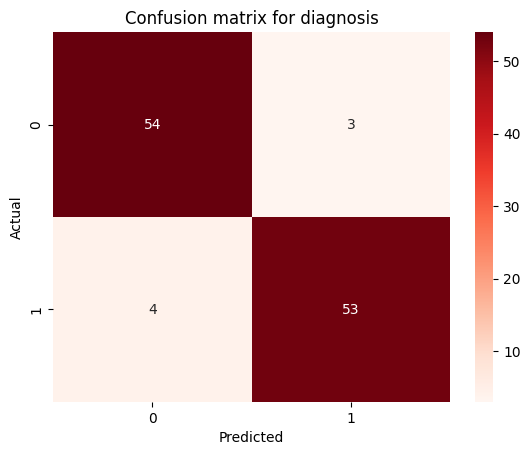

In [47]:
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix for diagnosis")

We want to get the probabilites from X-test, NOT the classifications. So we want raw values in (0,1). Edit this cell

In [48]:
# Get predicted probabilities for the test data
# You need to **CHANGE THIS CODE** and return only a vector of the probabilities for class = 1, which is the second column
y_prob = model.predict_proba(X_test)[:,1]

If we sort y_prob and y_test in the same order, then we can make a reasonable plot

In [49]:
# Sort the data for plotting
sorted_indices = np.argsort(y_prob)  ## argsort returns the indices ordered by the key values, so we can copy the sort order around
sorted_y_prob = y_prob[sorted_indices]
sorted_y_test = np.array(y_test)[sorted_indices]

Print the vector of sorted_y_prob and of sorted_y_test to verify the are generally increasing from 0 to 1

In [50]:
## Your code here
sorted_y_prob, sorted_y_test

(array([3.52555730e-05, 4.56258512e-05, 4.77567787e-05, 8.59571071e-05,
        8.74973801e-05, 9.07796229e-05, 1.02511521e-04, 2.01099013e-04,
        2.13783121e-04, 4.40952155e-04, 5.12817481e-04, 6.02617788e-04,
        6.53381948e-04, 8.46921068e-04, 8.63886259e-04, 8.70846040e-04,
        8.76265944e-04, 1.59722248e-03, 1.75485198e-03, 2.53559391e-03,
        3.65640764e-03, 3.67076366e-03, 3.78147970e-03, 4.52841652e-03,
        4.66861078e-03, 4.90874061e-03, 4.91858309e-03, 5.26568088e-03,
        5.71777001e-03, 5.77771704e-03, 7.40512352e-03, 1.09809207e-02,
        1.23672686e-02, 1.40523191e-02, 1.44847712e-02, 1.57255138e-02,
        2.49654336e-02, 2.79046031e-02, 2.81417716e-02, 2.93783916e-02,
        3.98180689e-02, 5.63856016e-02, 5.77435651e-02, 7.30997199e-02,
        7.44227677e-02, 8.13346848e-02, 8.18608761e-02, 8.32605485e-02,
        8.78962052e-02, 9.69299971e-02, 1.09854865e-01, 2.60516351e-01,
        2.85514075e-01, 3.02757352e-01, 3.64117737e-01, 4.060333

Now make a plot of a sigmoid curve against the 0/1 ground truth values. Fill in the code below as needed

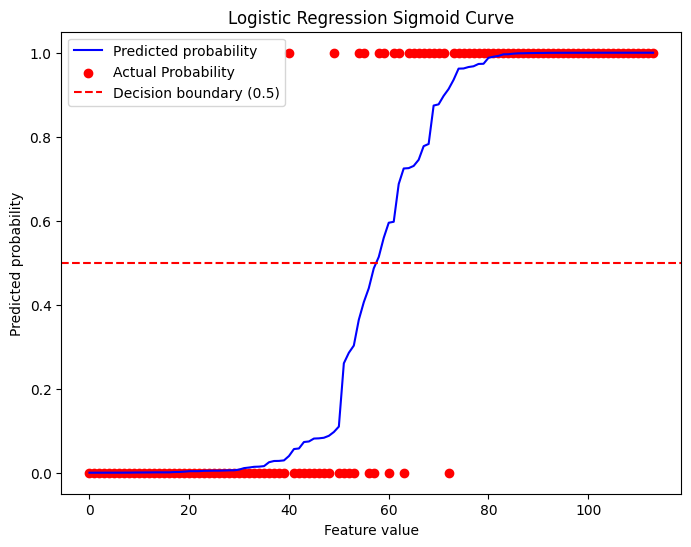

In [51]:
x = np.array([i for i in range(len(sorted_y_prob))])
    
# Plot the sigmoid curve (predicted probabilities)
plt.figure(figsize=(8, 6))

# Plot the sorted_y_prob vector as a line, labeled "Predicted probability" in blue
plt.plot(x, sorted_y_prob, color='blue', label='Predicted probability')

# Plot the sorted_y_test values as a scatter plot, labeled "Actual Probability" in red
plt.scatter(x, sorted_y_test, color='red', label='Actual Probability')

# Plot the cutoff line (decision boundary at 0.5)
plt.axhline(0.5, color='red', linestyle='--', label='Decision boundary (0.5)')

plt.title('Logistic Regression Sigmoid Curve')
plt.xlabel('Feature value')
plt.ylabel('Predicted probability')
plt.legend()
plt.show()

Binary classification for logistic regression relies on knowing where the 'split point' is. It default to alpha = 0.5, but this may not be optimal. You will define some helper functions to determine an optimal alpha.

In [52]:
def binary_classify(y_prob, alpha):
    # return a vector where index i is 1 if y_prob[i] > alpha, else 0 
    return [1 if i > alpha else 0 for i in y_prob]
def tp(true, observed): 
    # return the number of true positives, e.g. indices i where true[i] = observed[i] = 1
    return sum([1 if true[i] == 1 and observed[i] == 1 else 0 for i in range(len(true))])

def tn(true, observed): 
    return sum([1 if true[i] != 1 and observed[i] != 1 else 0 for i in range(len(true))])

def fp(true, observed): 
    return sum([1 if true[i] != 1 and observed[i] == 1 else 0 for i in range(len(true))])

def fn(true, observed): 
    return sum([1 if true[i] == 1 and observed[i] != 1 else 0 for i in range(len(true))])

def precision(true, observed): 
    return tp(true, observed) / (tp(true, observed) + fp(true, observed))

def recall(true, observed): 
    return tp(true, observed) / (tp(true, observed) + fn(true, observed))
                                 
def score(true, observed, weights):
    # return a weighted score of tp, fp, tn fn according to the weights
    tps, fps, tns, fns = weights
    return tp(true, observed) * tps + fp(true, observed) * fps + tn(true, observed) * tns + fn(true, observed) * fns

Test your code works and get a high precision

In [53]:
observed = binary_classify(sorted_y_prob, 0.5)
q = zip(observed, sorted_y_test)
print(precision(sorted_y_test, observed))

0.9464285714285714


Create a plot of recall vs precision for various alpha. Let alpha from from 0 to 100 in steps of 0.01. Compute the new classification, then the precision and recall score. Then plot a scatter plot
of (precision(alpha), recall(alpha)) points. Code is provided to plot the alphas along the graph.

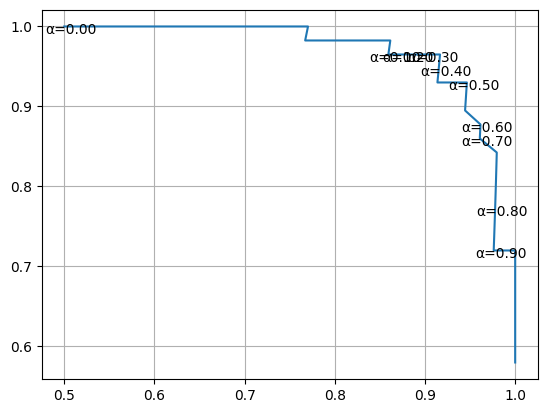

In [65]:
ps = []
rs = []
for i in range(100):
    alpha = i/100.0
    observed = binary_classify(sorted_y_prob, alpha)
    ps.append(precision(sorted_y_test, observed))
    rs.append(recall(sorted_y_test, observed))

plt.plot(ps, rs)

# Don't edit the following, it makes labels. You can tweak it once you understand if you want
# Annotate alpha values at selected points (for example, every 10th point)
for i in range(0, 100, 10):  # You can change the step size (10) to select more/fewer points
    alpha = i / 100.0
    plt.annotate(f'α={alpha:.2f}', (ps[i], rs[i]), 
                 textcoords="offset points", xytext=(5, -5), ha='center')
plt.grid()

Now we want to see how weighted scores vary as a function of alpha. Start with a score vector of (0,1,0,3) (why?)

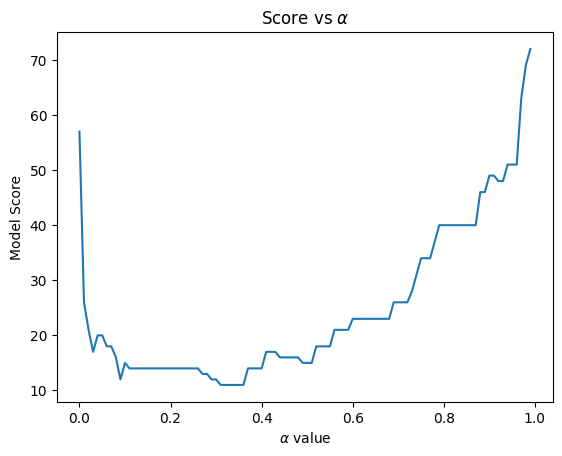

In [121]:
alphas = [i / 100.0 for i in range(100)]
ps = []
rs = []
scores = []
w = (0, 1, 0, 3)
for alpha in alphas:
    observed = binary_classify(sorted_y_prob, alpha)
    ps.append(precision(sorted_y_test, observed))
    rs.append(recall(sorted_y_test, observed))
    scores.append(score(sorted_y_test, observed, w))

plt.title("Score vs $\\alpha$")
plt.xlabel("$\\alpha$ value")
plt.ylabel("Model Score")
plt.plot(alphas, scores)
plt.show()

Get the index of the lowest score and the lowest score itself

In [122]:
minind = np.argmin(scores)
minind, np.min(scores)

(np.int64(31), np.int64(11))

Properly define opt_alpha based on the scores vector

In [123]:
opt_alpha = alphas[minind]
observed = binary_classify(sorted_y_prob, opt_alpha)
ps = precision(sorted_y_test, observed)
rs = recall(sorted_y_test, observed)
opt_tp = tp(sorted_y_test, observed)
opt_tn = tn(sorted_y_test, observed)
opt_fp = fp(sorted_y_test, observed)
opt_fn = fn(sorted_y_test, observed)

Make the following line nicer -- what are you printing? Give labels

In [124]:
print(f"Precision:\t{ps}\nRecall: \t{rs}\nTrue Pos:\t{opt_tp}\nTrue Neg: \t{opt_tn}\nFalse Pos: \t{opt_fp}\nFalse Neg:\t{opt_fn}\n")

Precision:	0.9166666666666666
Recall: 	0.9649122807017544
True Pos:	55
True Neg: 	52
False Pos: 	5
False Neg:	2



Now draw a nice confusion matrix. No need to edit the code. How do you interpret this? Change the weights above and redo a few times. What happens?

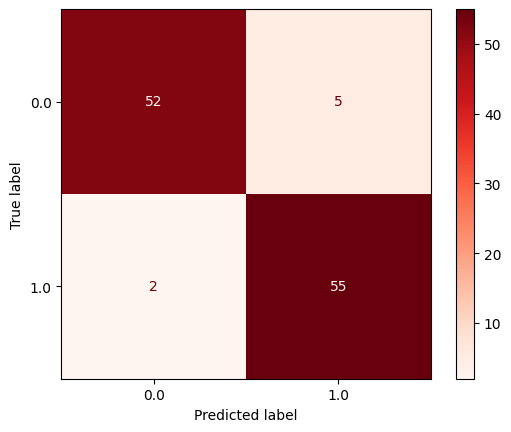

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(sorted_y_test, observed, labels=lreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lreg.classes_)
disp.plot(cmap='Reds')
plt.show()

Prioritizing false negatives makes the true negatives decrease, as well, and false positives are much more common. Making the coefficients negative seems to throw the entire model off, and there are lots of false negatives.